In [4]:
# 数据读取与分析
import pandas as pd
import matplotlib.pyplot as plt

train_data=pd.read_csv("C:\\Users\\hjg\\OneDrive\\桌面\\对话意图识别\\train.csv",sep='\t',header=None)
test_data=pd.read_csv("C:\\Users\\hjg\\OneDrive\\桌面\\对话意图识别\\test.csv",sep='\t',header=None)
'#'.join(train_data[1].unique())
train_data[1].value_counts()
# 文本字符个数统计
train_data[0].apply(len).plot(kind='hist')
test_data[0].apply(len).plot(kind='hist')

plt.legend(['Train','Test'])
# 对字符长度进行统计
train_data[0].apply(len).describe()

([], [])

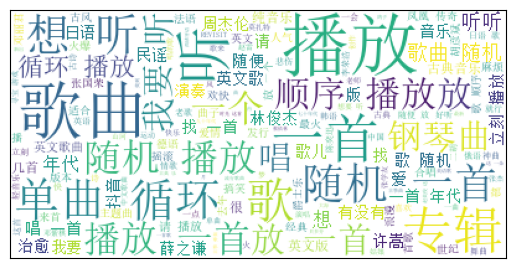

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
# 中文分词
content=train_data[train_data[1]=='Music-Play'][0]
content=' '.join(content)
content=jieba.cut(content)
#取出停用词表
cn_stopwords = ' '.join(str(x) for x in pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])
words = [x for x in content if x not in cn_stopwords]
# 绘制云图
wordcloud=WordCloud(background_color='white',max_words=1000,font_path='./simsun.ttc')
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]);plt.yticks([])

In [ ]:
- pandas：数据读取、统计
- matplotlib：可视化处理
- jieba: 中文分词
- wordcloud: 绘制云图

In [11]:
def segment(text):
    return ' '.join(jieba.cut(text))
train_data[0]=train_data[0].apply(segment)
train_data

,0,1
0,还有 双鸭山 到 淮阴 的 汽车票 吗 13 号 的,Travel-Query
1,从 这里 怎么 回家,Travel-Query
2,随便 播放 一首 专辑 阁楼 里 的 佛里 的 歌,Music-Play
3,给 看 一下 墓 王之王 嘛,FilmTele-Play
4,我 想 看 挑战 两把 s686 打 突变 团 竞 的 游戏 视频,Video-Play
...,...,...
12095,一千六百五十 三加 三千 一百六十五 点 六五 等于 几,Calendar-Query
12096,稍 小点 客厅 空调 风速,HomeAppliance-Control
12097,黎耀祥 陈豪 邓萃雯 畲诗曼 陈 法拉 敖嘉年 杨怡 马浚伟 等 到场 出席,Radio-Listen
12098,百事 盖世 群星 星光 演唱会 有 谁,Video-Play


In [1]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt

#读取数据集
train_data=pd.read_csv('C:\\Users\\hjg\\OneDrive\\桌面\\对话意图识别\\train.csv',sep='\t',header=None)
test_data=pd.read_csv('C:\\Users\\hjg\\OneDrive\\桌面\\对话意图识别\\test.csv',sep='\t',header=None)
#分词
train_text=' '.join(list(train_data[0]))
train_words=jieba.cut(train_text)
#读取停用词
cn_stopwords = ' '.join(str(x) for x in pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])
train_words=[x for x in train_words if x not in cn_stopwords]
train_words=[x for x in train_words if len(x)>1]
train_words=[x for x in train_words if not x.isdigit()]#剔除纯数字                    

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hjg\AppData\Local\Temp\jieba.cache
Loading model cost 0.866 seconds.
Prefix dict has been built successfully.


In [12]:
# 统计每个单词出现的频次
from collections import Counter
train_words_freq=Counter(train_words)
# 过滤频次比较低的单词
train_words=[x for x in train_words if train_words_freq[x]>=5]

In [13]:
#定义一个字典
train_word_prior={}
#对于训练集的每个样本
for row in train_data.iloc[:].itertuples():
    # text与label分别对应这行的文本数据与标签数据
    text,label=row[1],row[2]
    
    #将每行的第一列文本数据分词
    words=jieba.cut(text)
    
    #保证每行的词出现在已经筛好的词汇表中
    words=[x for x in words if x in train_words]
    
    #如果words为0，代表这行数据是脏数据，不统计
    if len(words)==0:
        continue
    #对每个单词进行统计（计算）
    for word in words:
        #如果字典中未出现这个单词，定义total为0
        if word not in train_word_prior:
            train_word_prior[word]={"total":0}
        #如果字典中的单词未出现这个单词对应的标签，则打上标记，赋值为0
        if label not in train_word_prior[word]:
            train_word_prior[word][label]=0
    #计数
    train_word_prior[word][label]+=1
    train_word_prior[word]['total']+=1
    

In [14]:
# 转换成DataFrame表格形式并转置
train_word_prior=pd.DataFrame(train_word_prior).T
# 填充缺失值，处理单词在其他意图中没有出现的情况
train_word_prior.fillna(0,inplace=True)

In [24]:
train_word_prior

,total,Travel-Query,Music-Play,Alarm-Update,Video-Play,FilmTele-Play,Radio-Listen,Audio-Play,Other,TVProgram-Play,Weather-Query,HomeAppliance-Control,Calendar-Query
汽车票,33.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
回家,10.0,3.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
随便,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
播放,676.0,0.0,189.0,0.0,114.0,256.0,79.0,8.0,0.0,28.0,0.0,2.0,0.0
一首,121.0,0.0,116.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
一年,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
回应,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
有人,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
媒体,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [16]:
#计算单词在每个类别出现的概率,得到每个单词所对应的意图
for category in train_data[1].unique():
    train_word_prior[category]/=train_word_prior['total']
train_word_prior

,total,Travel-Query,Music-Play,Alarm-Update,Video-Play,FilmTele-Play,Radio-Listen,Audio-Play,Other,TVProgram-Play,Weather-Query,HomeAppliance-Control,Calendar-Query
汽车票,33.0,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
回家,10.0,0.030000,0.020000,0.030000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
随便,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
播放,676.0,0.000000,0.000414,0.000000,0.000249,0.000560,0.000173,0.000018,0.000000,0.000061,0.0,0.000004,0.0
一首,121.0,0.000000,0.007923,0.000000,0.000000,0.000000,0.000000,0.000068,0.000273,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
一年,3.0,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.0,0.000000,0.0
回应,4.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.062500,0.062500,0.0,0.000000,0.0
有人,3.0,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,0.000000,0.0
媒体,3.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.222222,0.000000,0.0,0.000000,0.0


In [17]:
# 每个意图所对应的单词
train_word_prior['category']=train_word_prior.columns[1:][train_word_prior.values[:,1:].argmax(1)]
train_word_prior.groupby('category').apply(lambda x:list(x.index))

C:\Users\hjg\AppData\Local\Temp\ipykernel_23992\3241056410.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_word_prior.groupby('category').apply(lambda x:list(x.index))


category
Alarm-Update             [早上, 七点, 我定, 下午, 参加, 闹钟, 活动, 提醒, 创建, 上午, 取消, 设...
Audio-Play               [这首, 法国, 夏天, 故事, 法语, 章子怡, 小说, 广播剧, 英文版, 发行, 岳云...
Calendar-Query           [农历, 星期, 几号, 周六, 周四, 几月, 礼拜, 几是, 周二, 春节, 母亲节, ...
FilmTele-Play            [播放, 精英, 古装, 爱情, 电视剧, 一个, 推理, 一会, 地方, 导演, 王菲, ...
HomeAppliance-Control    [空调, 客厅, 风速, 打开, 烤箱, 儿童房, 调高, 洗衣机, 停止, 工作, 模式,...
Music-Play               [一首, 专辑, 游戏, 单曲, 循环, 经典音乐, 钢琴曲, 我要, 治愈, 日语, 歌曲...
Other                    [家人, 便宜, 服务, 好好, 介绍, 休息, 转到, 网络, 真的, 间隔, QQ, 收...
Radio-Listen             [新闻广播, 新闻台, 交通, 广播电台, 电台, 都市, 之声, 公司, 零点, 周末, ...
TVProgram-Play           [中央, 南昌, 联赛, 播出, 重播, 帮忙, 卫视, 法治, 剧场, 开播, 文化, 结...
Travel-Query             [汽车票, 回家, 随便, 和平, 深圳, 转播, 武汉, 北京, 飞机, 起飞, 随机, ...
Video-Play               [挑战, 视频, 花絮, 比赛, 现场, 查询, 第三集, 上线, 解说, 讲解, 大战, ...
Weather-Query            [河南, 桂林, 海南, 几级, 刮风, 几天, 明天, 气温, 适合, 紫外线, 指数, ...
dtype: object

In [18]:
df=train_word_prior.groupby('category').apply(lambda x:list(x.index))
intent_categories=df.index

C:\Users\hjg\AppData\Local\Temp\ipykernel_23992\350013034.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df=train_word_prior.groupby('category').apply(lambda x:list(x.index))


In [19]:
#意图类别所对应的规则
import re
intent_patterns=[re.compile('|'.join(x)) for x in df.values]

In [ ]:
pd.DataFrame(
    {
        "ID": range(1,len(test_data)+1),
        "target": test_pred
    }
),to_csv('正则提交.sv',index=None)

In [2]:
# 导入相应的包:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# 先读取训练集、测试集数据:
train_data=pd.read_csv('C:\\Users\\hjg\\OneDrive\\桌面\\对话意图识别\\train.csv',sep='\t',header=None)
test_data=pd.read_csv('C:\\Users\\hjg\\OneDrive\\桌面\\对话意图识别\\train.csv',sep='\t',header=None)
# 接着读取停用词表:
cn_stopwords = pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0].values

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    tokenizer=jieba.lcut,
    stop_words=list(cn_stopwords)
)
train_tfidf = tfidf.fit_transform(train_data[0])
test_tfidf = tfidf.transform(test_data[0])

D:\ana\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hjg\AppData\Local\Temp\jieba.cache
Loading model cost 1.031 seconds.
Prefix dict has been built successfully.
D:\ana\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'll', 'm', 'mon', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '下', '不', '为什', '什', '今', '使', '先', '却', '只', '唷', '啪', '喔', '天', '好', '後', '最', '漫', '然', '特', '特别', '见', '设', '说', '达', '面', '麽', '－'] not in stop_words.
  warnings.warn(


In [5]:
print(train_tfidf)

  (0, 2674)	0.24539210929831917
  (0, 38)	0.38426321833653454
  (0, 6491)	0.4022479484622733
  (0, 6725)	0.5817768121458577
  (0, 2533)	0.540237744456148
  (1, 3096)	1.0
  (2, 6289)	0.2884418589005346
  (2, 1499)	0.5239045236728528
  (2, 9745)	0.3020536333212562
  (2, 9954)	0.5239045236728528
  (2, 805)	0.30715300596941714
  (2, 586)	0.23716756310962978
  (2, 5299)	0.15922283755723632
  (2, 10099)	0.317284829001463
  (3, 7229)	0.6832673724642844
  (3, 3246)	0.6832673724642844
  (3, 7611)	0.25747115460087117
  (4, 8916)	0.1676704885913037
  (4, 6781)	0.24436720992182795
  (4, 7920)	0.36127289328884093
  (4, 3115)	0.3822642186953358
  (4, 7897)	0.3989259710219518
  (4, 416)	0.3989259710219518
  (4, 862)	0.3989259710219518
  (4, 5163)	0.3371190126326683
  :	:
  (12096, 4042)	0.5168484954776312
  (12096, 10359)	0.34513220765262637
  (12096, 3885)	0.4153538649469277
  (12096, 7882)	0.27871779186652146
  (12097, 10465)	0.3128971879910216
  (12097, 6076)	0.3128971879910216
  (12097, 5404)	0.3

In [18]:
cv_pred = cross_val_predict(
    LogisticRegression(),
    train_tfidf, train_data[1]
)
print(classification_report(train_data[1], cv_pred))

D:\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       precision    recall  f1-score   support

         Alarm-Update       0.98      0.93      0.96      1264
           Audio-Play       0.74      0.50      0.59       226
       Calendar-Query       0.99      0.95      0.97      1214
        FilmTele-Play       0.70      0.93      0.80      1355
HomeAppliance-Control       0.94      0.97      0.96      1215
           Music-Play       0.88      0.87      0.87      1304
                Other       0.39      0.07      0.11       214
         Radio-Listen       0.94      0.89      0.92      1285
       TVProgram-Play       0.72      0.45      0.55       240
         Travel-Query       0.92      0.96      0.94      1220
           Video-Play       0.90      0.87      0.88      1334
        Weather-Query       0.92      0.96      0.94      1229

             accuracy                           0.89     12100
            macro avg       0.84      0.78      0.79     12100
         weighted avg       0.89      0.89      0.89 

In [19]:
from sklearn.svm import LinearSVC

cv_pred = cross_val_predict(
    LinearSVC(),
    train_tfidf, train_data[1]
)
print(classification_report(train_data[1], cv_pred))

                       precision    recall  f1-score   support

         Alarm-Update       0.97      0.95      0.96      1264
           Audio-Play       0.64      0.71      0.67       226
       Calendar-Query       0.98      0.97      0.98      1214
        FilmTele-Play       0.81      0.89      0.85      1355
HomeAppliance-Control       0.97      0.98      0.98      1215
           Music-Play       0.90      0.89      0.89      1304
                Other       0.31      0.25      0.27       214
         Radio-Listen       0.94      0.90      0.92      1285
       TVProgram-Play       0.66      0.62      0.64       240
         Travel-Query       0.95      0.98      0.97      1220
           Video-Play       0.92      0.88      0.90      1334
        Weather-Query       0.96      0.97      0.97      1229

             accuracy                           0.91     12100
            macro avg       0.83      0.83      0.83     12100
         weighted avg       0.91      0.91      0.91 

In [20]:
model = LinearSVC()
model.fit(train_tfidf, train_data[1])
pd.DataFrame({
    'ID':range(1, len(test_data) + 1),
    "Target":model.predict(test_tfidf)
}).to_csv('svm.csv', index=None)
# 可以提交到